# IMAGE ENCRYPTION USING AES

- Numpy array which is used to store the pixels are encrypted and is later decrypted using AES (Advanced Encryption Standard)
- Source AES Algorithm : https://cryptobook.nakov.com/symmetric-key-ciphers/aes-encrypt-decrypt-examples

In [1]:
from PIL import Image
import numpy as np
from IPython import display

import pyaes
import pbkdf2
import os
import secrets

import ast
import time

import cv2

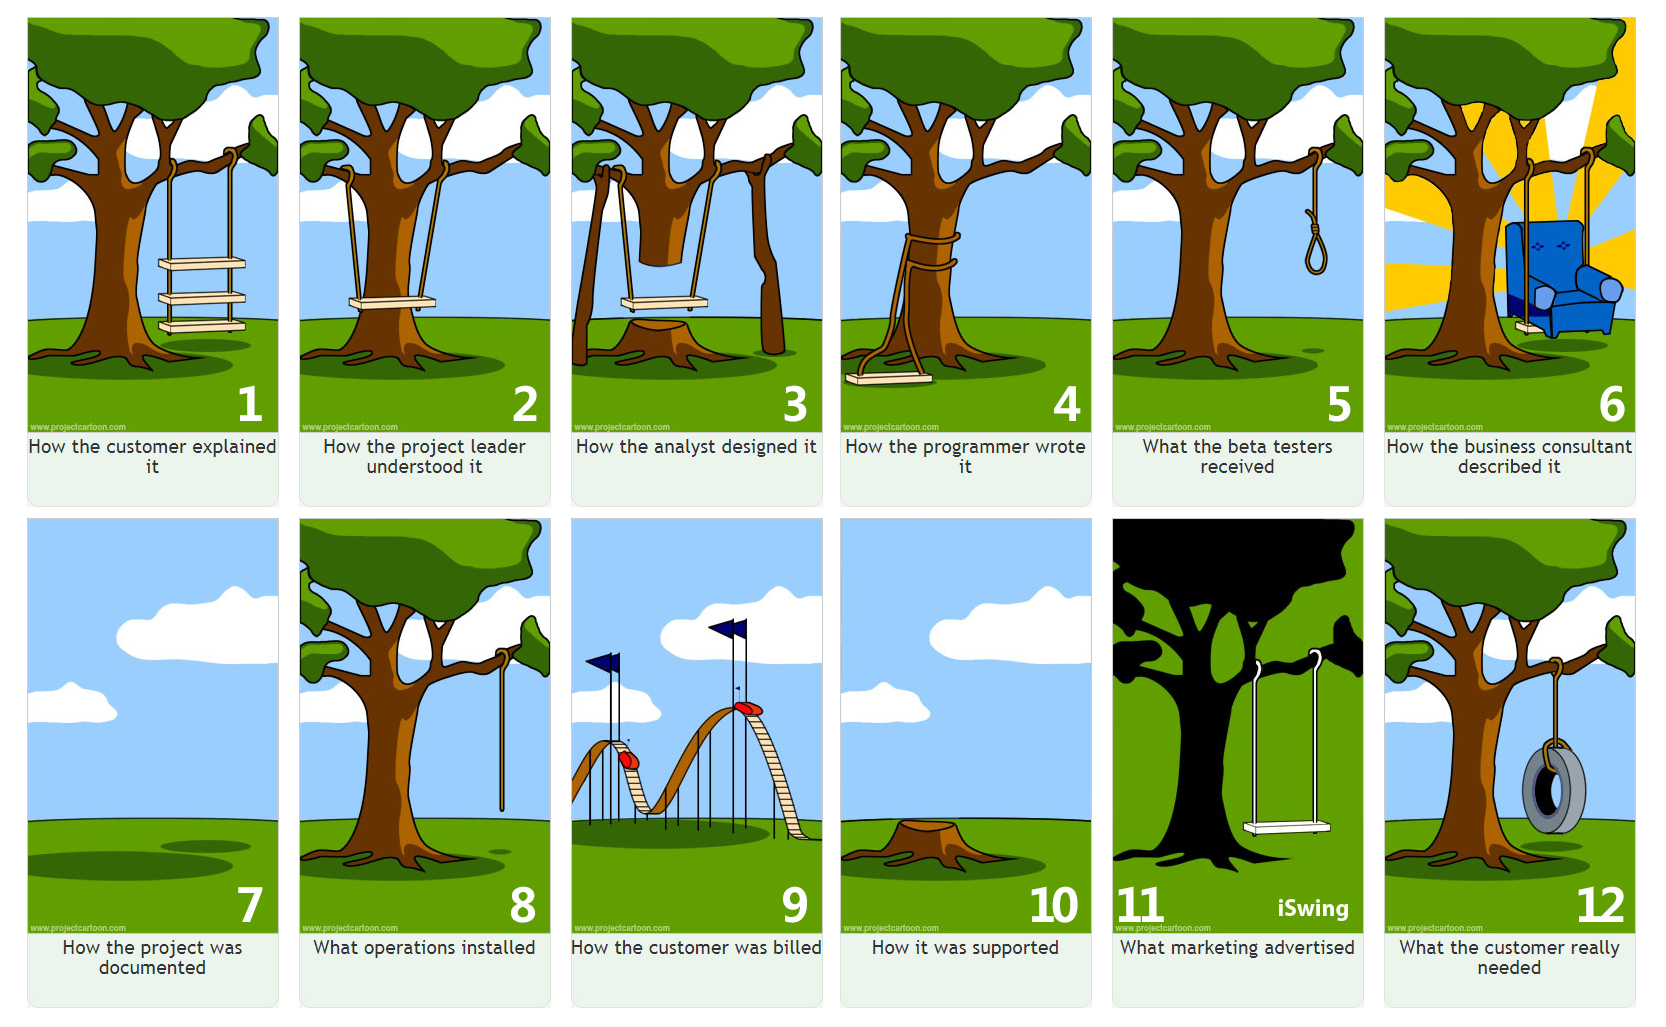

In [2]:
path="res/SWDevtProcess.jpg"

name,extension=os.path.splitext(path)

if(extension==".png"):
    img_png=cv2.imread(path)
    cv2.imwrite(name+".jpg", img_png, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

img=Image.open(name+".jpg")

np_image=np.array(img) # PIXELS ARE STORED IN A NP-ARRAY
display.Image(path)

In [3]:
np_image=list(np_image)

### ENCRYPTION USING AES

In [4]:
password="aespython"
passwordSalt=os.urandom(16)
key=pbkdf2.PBKDF2(password,passwordSalt).read(32) #KEY - PRE-SHARED WITH THE RECEIVER
iv=secrets.randbits(256) #INITIALIZATION VECTOR - PRE-SHARED WITH THE RECEIVER

aes=pyaes.AESModeOfOperationCTR(key,pyaes.Counter(iv))
encrypted=aes.encrypt(str(np_image))

### DECRYPTION USING AES

In [5]:
aes=pyaes.AESModeOfOperationCTR(key,pyaes.Counter(iv))
decrypted=aes.decrypt(encrypted)
decrypted=str(decrypted)

### MODIFICATIONS TO THE DECRYPTED LIST

In [6]:
decrypted=decrypted.replace("b","")
decrypted=decrypted.replace("'","")
decrypted=decrypted.replace("(","")
decrypted=decrypted.replace(")","")
decrypted=decrypted.replace(" ","")
decrypted=decrypted.replace("\\n","")
decrypted=decrypted.replace("array","")
decrypted=decrypted.replace(",dtype=uint8","")

In [7]:
decrypted_final=np_image.copy()

In [8]:
conv_list=ast.literal_eval(decrypted)

for i in range(0,len(conv_list)):
    for j in range(0,len(conv_list[i])):
        if(conv_list[i][j] is Ellipsis):
            continue
        for k in range(0,len(conv_list[i][j])):
            decrypted_final[i][j][k]=int(conv_list[i][j][k])

decrypted_final=np.array(decrypted_final)

### SAVING THE IMAGE

In [9]:
decrypted_img=Image.fromarray(decrypted_final)

decrypted_img.save("res/decrypted.jpg")

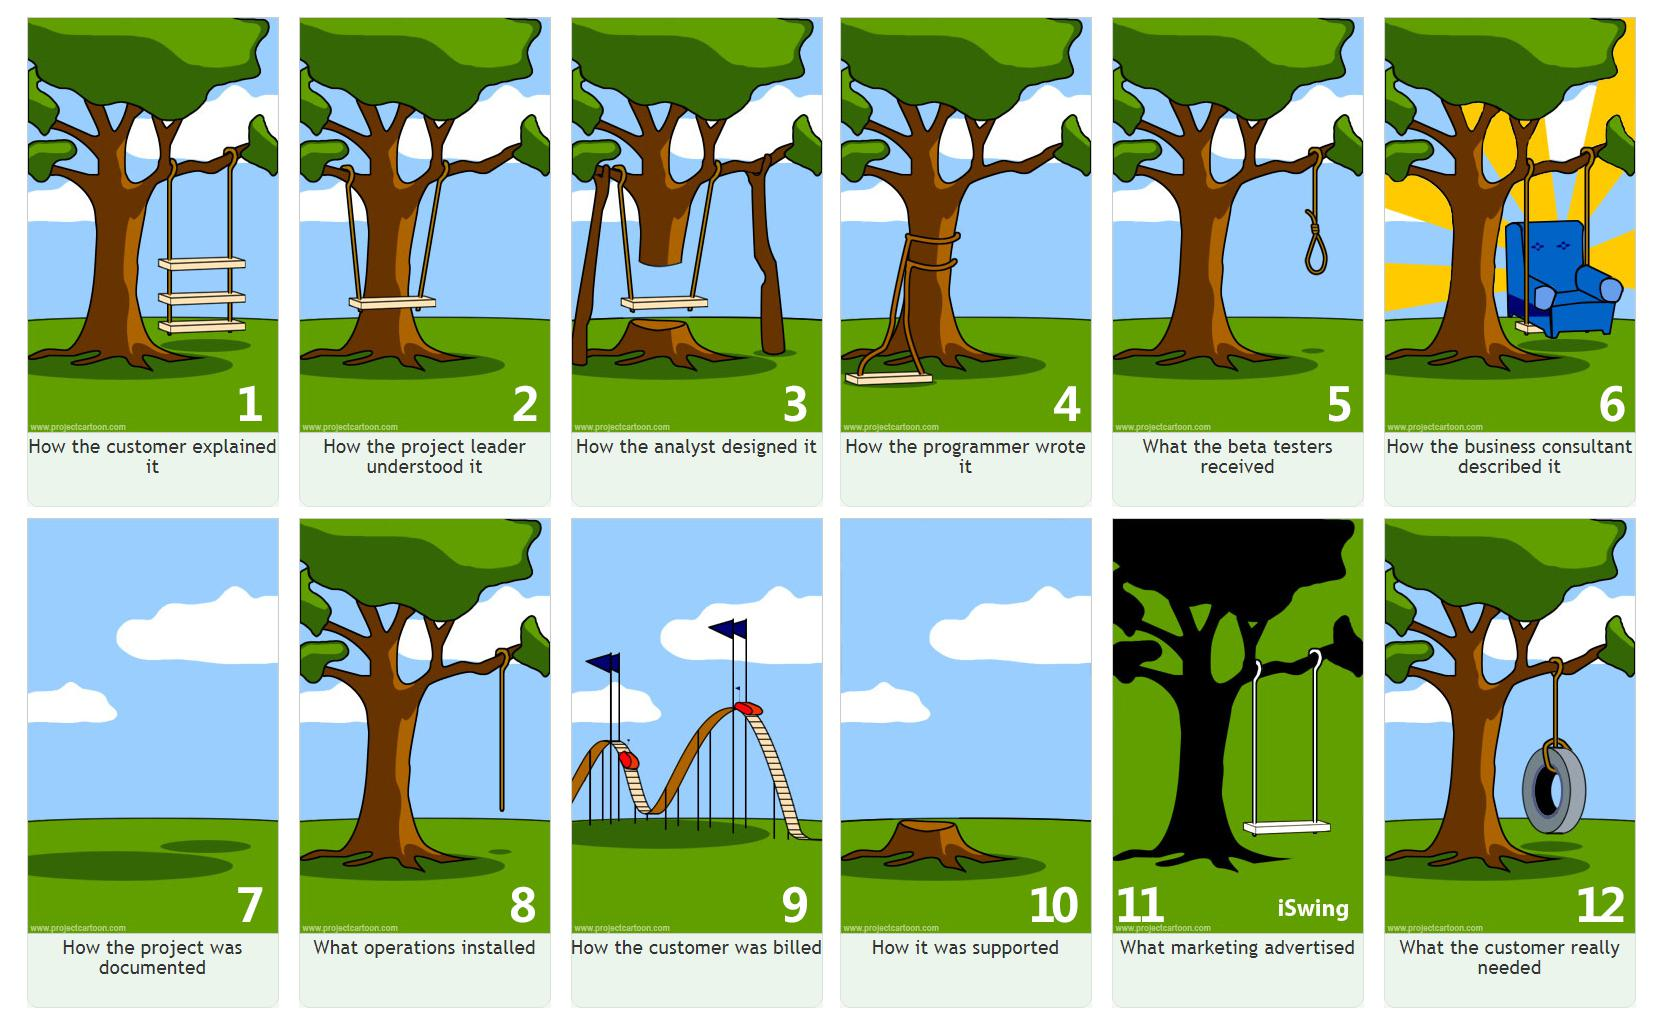

In [10]:
display.Image("res/decrypted.jpg")

### AVERAGE RUNNING TIME

- Avg. time taken by this algorithm  = 4 seconds for an image of size 6 MB